In [1]:
import numpy as np
import cv2
import time
import os

import matplotlib.pyplot as plt

### Subtraction, downsample

In [2]:
img = cv2.imread('data/train/baby_0.jpg')

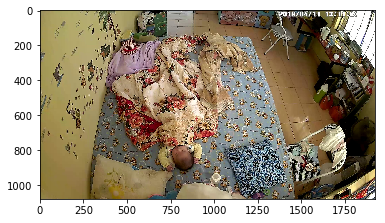

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

- [Basic image resizing with openCV](https://www.pyimagesearch.com/2014/01/20/basic-image-manipulations-in-python-and-opencv-resizing-scaling-rotating-and-cropping/)